# Reduce Features

Hi! This notebook was made to provide an interface to allow for the combining of features. Hopefully it is straight-forward enough to prove useful

To evaluate each cell, press `shift` + `enter`

**Notes**
 - The `plotTop` function takes a `DataFrame` and plots the top 10 highest positive correlations, as well as the **smallest 5** correlations. Hopefully this makes sense
 - To average features and see what the new highest correlations are, simply change the variable `combineFeats`!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load ratings for Concrete Object Nouns in each study
tmp = np.load('data/CON_ratings.npz')
soe_creaRatings = tmp['soe_creaRatings']
cat_creaRatings = tmp['cat_creaRatings']
feats           = tmp['feats']

# Load words for each study
tmp = np.load('data/word_selections.npz')
cat_keep = tmp['cat_keep']; soe_keep = tmp['soe_keep']

# combine words into one large dataframe
ratings = np.concatenate([cat_creaRatings[cat_keep], soe_creaRatings[soe_keep]])
ratings = pd.DataFrame(ratings, columns=feats)

In [2]:
# Define helper function to plot top values
def plotTop(df):
    t = pd.DataFrame(np.triu(df.corr(),1),columns=df.columns,index=df.columns).unstack()
    t = t[t !=0 ]
    c = pd.concat([t.nlargest(10),t.nsmallest(5)])
    display(c.to_frame().reset_index())
    return t

,level_0,level_1,0
0,Sound,Audition,0.957232
1,Loud,Audition,0.954097
2,Happy,Pleasant,0.928960
3,Sound,Loud,0.897002
4,Fast,Motion,0.887537
5,Needs,Near,0.877811
6,Low,Loud,0.868735
7,Low,Audition,0.865496
8,Disgusted,Unpleasant,0.849930
9,Smell,Taste,0.848135


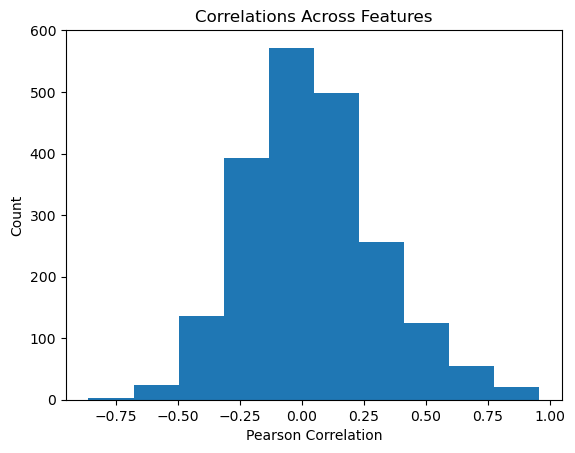

In [3]:
# Display and show initial correlations
t_init = plotTop(ratings)
plt.hist(t_init); plt.title('Correlations Across Features'); 
plt.xlabel('Pearson Correlation'); plt.ylabel('Count'); 

In [4]:
'''
This is the cell that does the work! Simply add features 
that should be combined and this function creates a new averaged
feature, and removes the original features. The new correlations are 
then shown below

The 'subFeats' variable subtracts the second variable from the first. 
This should be used when two variables have a large negative correlation

What is shown are the correlations across all **262 words**
'''
# Make function that combines features
def makeCombined(df):
    combineFeats = [
    ['Sound', 'Loud','Audition'],
    ['Happy','Pleasant'],
    ['Fast','Motion','Path','Biomotion'],
    ['Needs','Near'],
    ['Smell','Taste'],
    ['Disgusted','Unpleasant','Angry','Sad'],
    ['Fearful','Harm','Pain'],
    ['Needs','Near'],
    ['Smell','Taste'],
    ['Arousal','Attention','Surprised'],
    ['Body','Face','Human'],
    ['Cognition','Communication','Speech']]
    subFeats = [
    ['Large', 'Small'],
    ['High','Low'],
    ['Long','Short']]
    rmFeats = [k for t in combineFeats for k in t] + [k for t in subFeats for k in t]

    nRatings = {}
    for f in feats:
        if f not in rmFeats:
            nRatings[f] = df[f] 
    for c in combineFeats:
        nName = '_'.join(c)
        t = df[c]
        t = t - t.mean()
        t = t / t.std()
        t = t.mean(1)
        nRatings[nName] = t
    for c in subFeats:
        nName = '_'.join(c) + '_sub'
        t = df[c]
        t = t - t.mean()
        t = t / t.std()
        t = t[c[0]] - t[c[1]]
        nRatings[nName] = t
    nRatings = pd.DataFrame(nRatings)
    return nRatings
tmp = makeCombined(ratings)
plotTop(tmp);

,level_0,level_1,0
0,Needs_Near,Self,0.773266
1,Duration,Time,0.759059
2,Fast_Motion_Path_Biomotion,Sound_Loud_Audition,0.705004
3,Smell_Taste,Color,0.664762
4,Large_Small_sub,Sound_Loud_Audition,0.646302
5,Smell_Taste,Head,0.645131
6,Fast_Motion_Path_Biomotion,Complexity,0.636890
7,Needs_Near,Number,0.614635
8,Arousal_Attention_Surprised,Fast_Motion_Path_Biomotion,0.595294
9,Manipulation,UpperLimb,0.593960


In [5]:
'''
This now shows the feature correlations in the word subsets
'''
soe_nRatings = makeCombined(pd.DataFrame(soe_creaRatings[soe_keep],columns=feats));
cat_nRatings = makeCombined(pd.DataFrame(cat_creaRatings[cat_keep],columns=feats));

print('## SOE'); plotTop(soe_nRatings); 
print('\n## CAT'); plotTop(cat_nRatings);


## SOE


,level_0,level_1,0
0,Smell_Taste,Head,0.806695
1,Duration,Time,0.798198
2,Needs_Near,Manipulation,0.769645
3,Fast_Motion_Path_Biomotion,Sound_Loud_Audition,0.762689
4,Smell_Taste,Color,0.760060
5,Toward,Head,0.713932
6,Fast_Motion_Path_Biomotion,Complexity,0.700636
7,Large_Small_sub,Sound_Loud_Audition,0.678209
8,Fast_Motion_Path_Biomotion,Away,0.663647
9,Fearful_Harm_Pain,Disgusted_Unpleasant_Angry_Sad,0.655339



## CAT


,level_0,level_1,0
0,Needs_Near,Self,0.791362
1,Long_Short_sub,Landmark,0.693302
2,Needs_Near,Number,0.685380
3,Needs_Near,Landmark,0.683637
4,Duration,Time,0.638949
5,Self,Number,0.629090
6,Number,Landmark,0.613161
7,Fast_Motion_Path_Biomotion,Sound_Loud_Audition,0.604629
8,Touch,Vision,0.597636
9,Manipulation,UpperLimb,0.585902
